In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data_path = "../data/Ecommerce.csv"

df = pd.read_csv(data_path)

In [ ]:
df.head() 

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df.describe() 

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


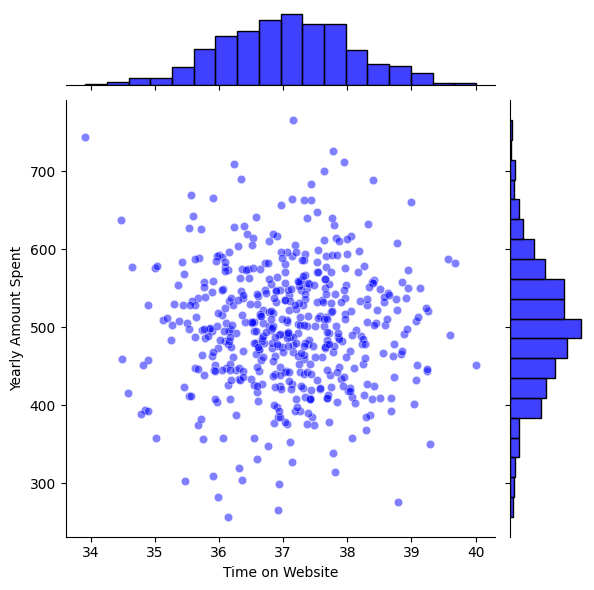

In [20]:
# TODO EDA (Exploratory Data Analysis) :
rows = ["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]
col = "Yearly Amount Spent"

sns.jointplot(x=rows[2], y=col, data=df, alpha=0.5, color="blue")

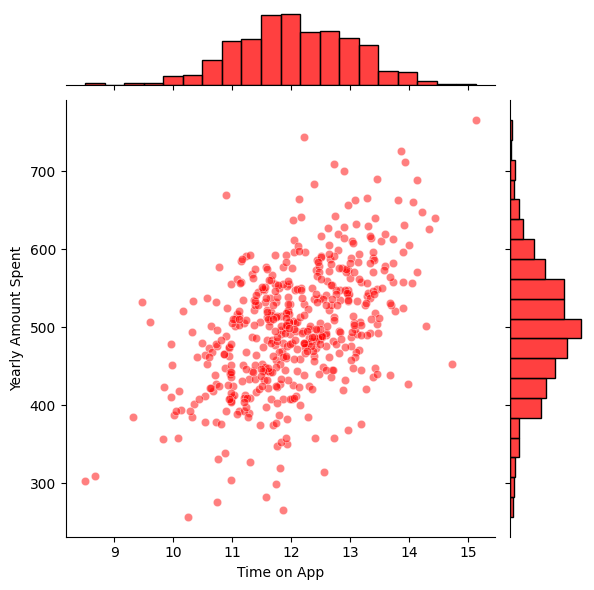

In [21]:
sns.jointplot(x=rows[1], y=col, data=df, alpha=0.5, color="red")

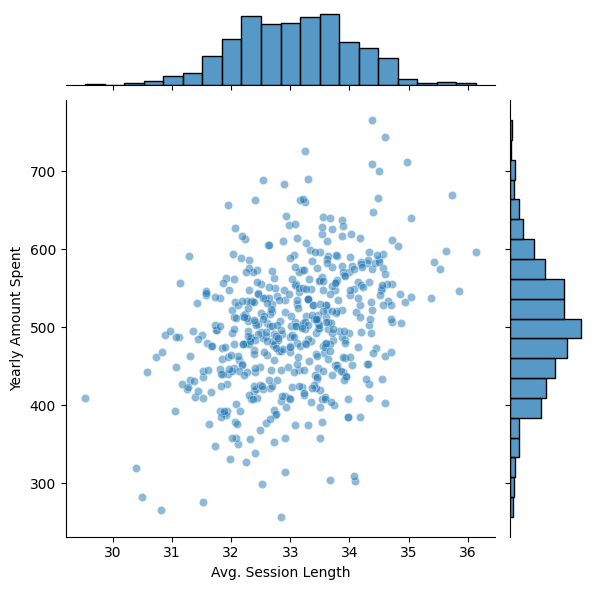

In [22]:
sns.jointplot(x=rows[0], y=col, data=df, alpha=0.5)

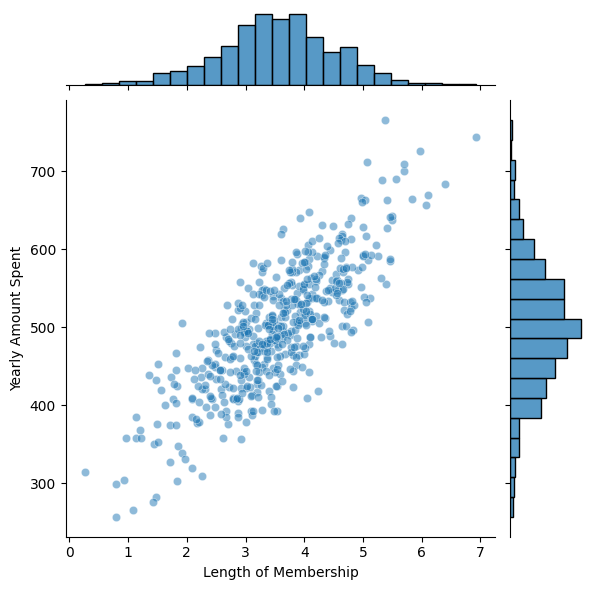

In [23]:
sns.jointplot(x=rows[3], y=col, data=df, alpha=0.5)

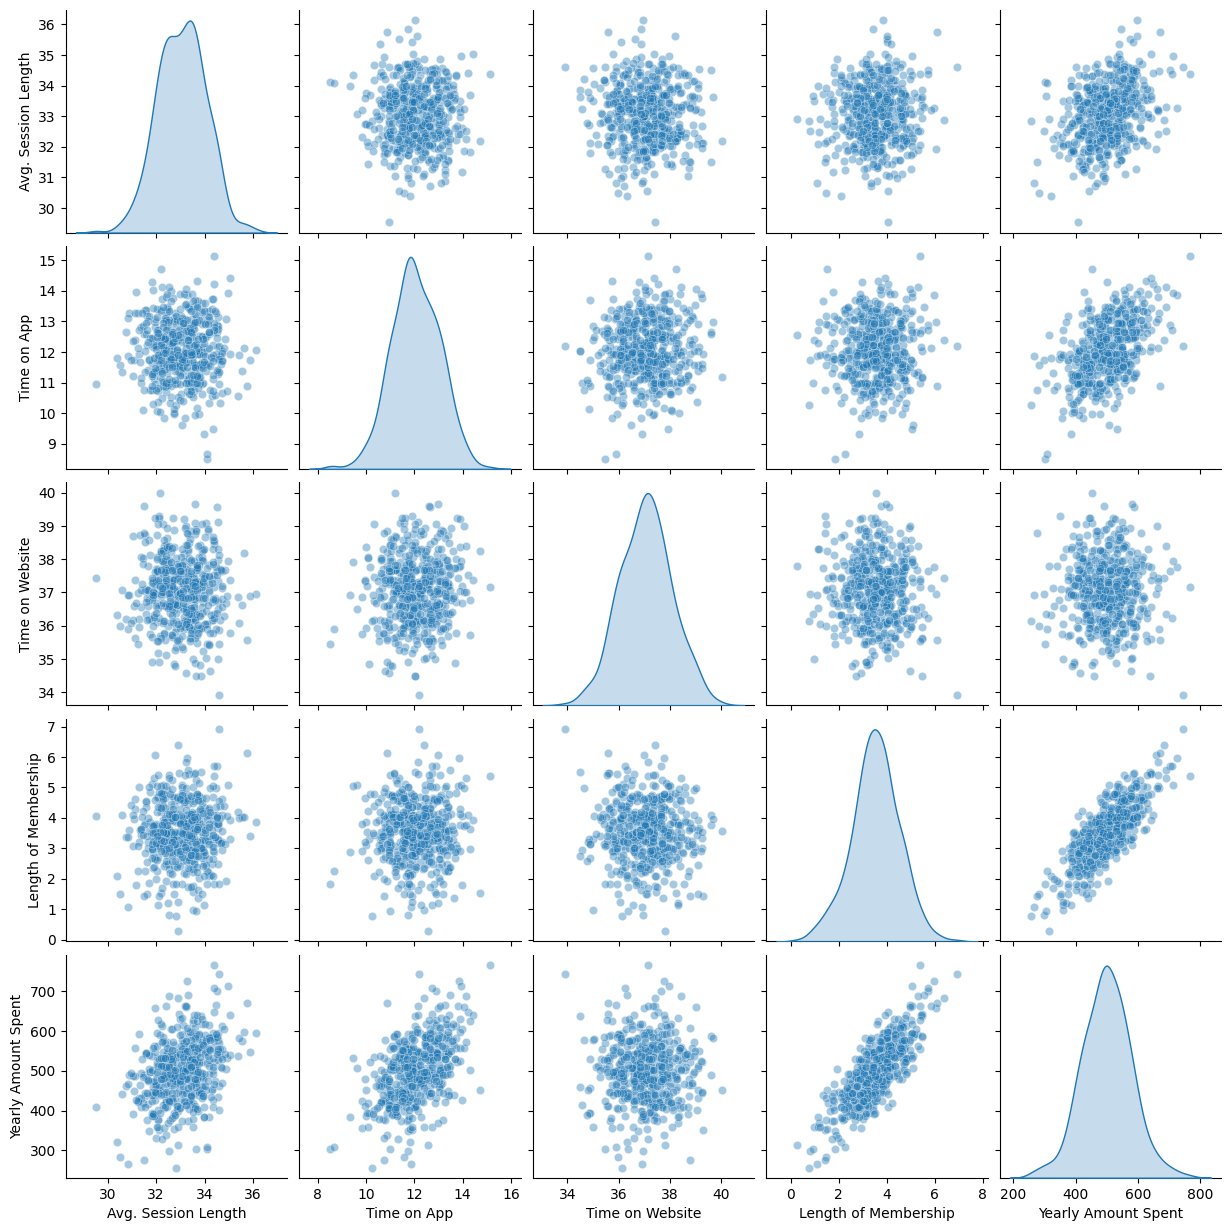

In [24]:
sns.pairplot(df, kind="scatter", plot_kws={"alpha": 0.4}, diag_kind="kde")

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df[rows]
Y = df[col]

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=123
)

# random state = (any number) :
# The random_state parameter acts as a "seed" for the random number generator
# used in splitting the data. By specifying a fixed value for it,
# you can ensure that the data split is consistent and reproducible every time you run the code.
# This is crucial for ensuring reproducibility of results, debugging, and making fair comparisons between different models.

In [28]:
# training the model :

from sklearn.linear_model import LinearRegression

# init :
lrm = LinearRegression()

In [ ]:
lrm.fit(X_train, Y_train) 
# fit method use this algorithm to find the best weights for our Linear model and Intercept : Ordinary Least Squares (OLS)
# we can access the weights using : lrm.coef_
# we can access the Intercept using : lrm.intercept_

LinearRegression()

In [30]:
lrm.coef_

array([25.36266491, 38.82367921,  0.80356799, 61.54905291])

In [31]:
cdf = pd.DataFrame(lrm.coef_, rows, columns=["coef"])
print(cdf)

                           coef
Avg. Session Length   25.362665
Time on App           38.823679
Time on Website        0.803568
Length of Membership  61.549053


In [32]:
predictions = lrm.predict(X_test)

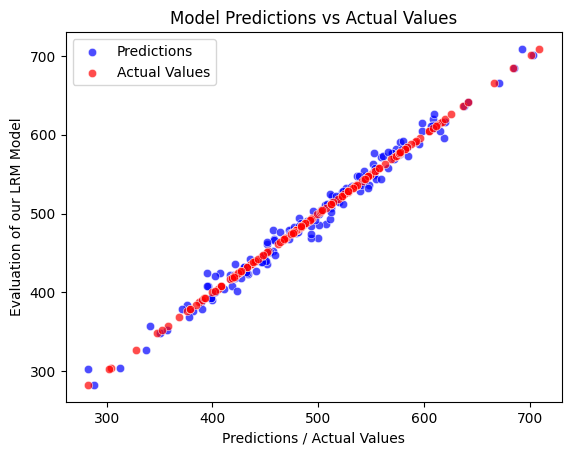

In [33]:
sns.scatterplot(x=predictions, y=Y_test, color="blue", alpha=0.7, label="Predictions")
sns.scatterplot(x=Y_test, y=Y_test, color="red", alpha=0.7, label="Actual Values")

# Add labels and legend
plt.xlabel("Predictions / Actual Values")
plt.ylabel("Evaluation of our LRM Model")
plt.title("Model Predictions vs Actual Values")
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    explained_variance_score,
    max_error,
    mean_absolute_percentage_error,
    median_absolute_error,
)


import math

In [ ]:
# Calculate metrics
mae = mean_absolute_error(Y_test, predictions) 
mse = mean_squared_error(Y_test, predictions)
rmse = math.sqrt(mse)
r2 = r2_score(Y_test, predictions)
mape = mean_absolute_percentage_error(Y_test, predictions)
medae = median_absolute_error(Y_test, predictions)
max_err = max_error(Y_test, predictions)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Median Absolute Error (MedAE):", medae)
print("Max Error:", max_err)

Mean Absolute Error (MAE): 7.988079194245103
Mean Squared Error (MSE): 102.72313941866041
Root Mean Squared Error (RMSE): 10.135242444986721
R-squared (R2): 0.9845789607829495
Mean Absolute Percentage Error (MAPE): 0.01684003679892117
Median Absolute Error (MedAE): 6.341449683578958
Max Error: 30.84499984075825


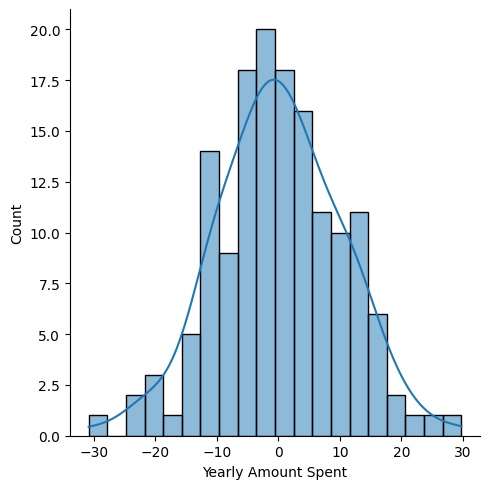

In [36]:
residuals = Y_test - predictions

sns.displot(residuals, bins=20, kde=True)

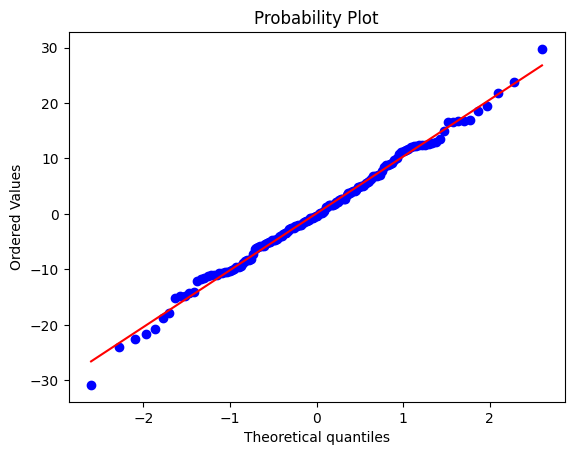

In [37]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()